In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes  
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_Lagos_State_local_government_areas_by_population', header = 0)

In [3]:
df_lagos = tables[2]
df_lagos.head()

,Rank,LGA,Population
0,1.0,Alimosho,5700714
1,2.0,Ajeromi-Ifelodun,1746634
2,3.0,Kosofe,665998
3,4.0,"Mushin, Lagos",633543
4,5.0,Oshodi-Isolo,621789


In [4]:
df_lagos.tail()

,Rank,LGA,Population
16,17.0,Apapa,217661
17,18.0,Lagos Island,209665
18,19.0,Epe,181715
19,20.0,Ibeju-Lekki,117542
20,NaN,Lagos State,14506023


In [5]:
df_lagos.drop(index=20, axis=0, inplace=True)

In [6]:
df_lagos.shape

(20, 3)

20 Local Government Areas

Define Foursquare Credentials and Version

In [7]:
CLIENT_ID = 'D3CF4ZFXEZVJDJ4CX0IOHO0YHGN0P1KD25ZVUH2QUINDYJQS' # your Foursquare ID
CLIENT_SECRET = 'Z0LIABRUZUCM3SXQKQGGOVYHBJXNYNWVLPCPOCL5FAHQGJM0' # your Foursquare Secret
VERSION = '20190113'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D3CF4ZFXEZVJDJ4CX0IOHO0YHGN0P1KD25ZVUH2QUINDYJQS
CLIENT_SECRET:Z0LIABRUZUCM3SXQKQGGOVYHBJXNYNWVLPCPOCL5FAHQGJM0


In [8]:
#!conda install -c conda-forge geocoder

Get location of each neighbourhood

In [9]:
geolocator = Nominatim()

lat_list = list()
long_list = list()

for lga in df_lagos["LGA"]:
    
    location = geolocator.geocode('{}, Lagos, Nigeria'.format(lga))
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
    else:
        latitude = longitude = None
    
    lat_list.append(latitude)
    long_list.append(longitude)
    
    print(lga, latitude, longitude)
    
df_lagos["Latitude"] = lat_list
df_lagos["Longitude"] = long_list    

Alimosho 6.6113371 3.2952634
Ajeromi-Ifelodun 6.4551217 3.33594625182987
Kosofe 6.581974 3.41483594161784
Mushin, Lagos 6.53263245 3.35202197179877
Oshodi-Isolo 6.54001 3.31241461318394
Ojo 6.46249745 3.16570641436411
Ikorodu 6.6191233 3.5041271
Surulere 6.48720145 3.35325872672398
Agege 6.6229165 3.3203386
Ifako-Ijaiye None None
Somolu 6.583333 3.466667
Amuwo-Odofin 6.4470234 3.26627971168259
Lagos Mainland 6.49306105 3.38824963720956
Ikeja 6.5960605 3.340787
Eti-Osa 6.4602312 3.53218066773601
Badagry 6.4167339 2.8846128
Apapa 6.445187 3.36837316794241
Lagos Island 6.5148613 3.49086616139006
Epe 6.52474955 4.05724579513234
Ibeju-Lekki 6.4711251 3.81475020068694


In [10]:
df_lagos['Latitude'].replace(np.nan, 6.6850, inplace=True)
df_lagos['Longitude'].replace(np.nan, 3.2885, inplace=True)
df_lagos

,Rank,LGA,Population,Latitude,Longitude
0,1.0,Alimosho,5700714,6.611337,3.295263
1,2.0,Ajeromi-Ifelodun,1746634,6.455122,3.335946
2,3.0,Kosofe,665998,6.581974,3.414836
3,4.0,"Mushin, Lagos",633543,6.532632,3.352022
4,5.0,Oshodi-Isolo,621789,6.540010,3.312415
5,6.0,Ojo,598332,6.462497,3.165706
6,7.0,Ikorodu,2535811,6.619123,3.504127
7,8.0,Surulere,504408,6.487201,3.353259
8,9.0,Agege,461123,6.622916,3.320339
9,10.0,Ifako-Ijaiye,428812,6.685000,3.288500


In [11]:
#df_lagos.to_csv("lagos lga location data.csv", index = False )

Let's view the various locations in lagos

In [12]:
address = 'Lagos, Nigeria'

geolocator = Nominatim()

location = geolocator.geocode(address)
if location is not None:
    latitude = location.latitude   
    longitude = location.longitude

print('The geograpical coordinate of Lagos are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lagos are 6.4550575, 3.3941795.


In [13]:
# Let's create map of Lagos using latitude and longitude values
map_lagos = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, lga, population in zip(df_lagos['Latitude'], df_lagos['Longitude'], df_lagos['LGA'], df_lagos['Population']):
    label = '{} <br>Population: {}'.format(lga, population)
    label = folium.Popup(label)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lagos)  
    
map_lagos

Let's get hotels around each of the LGA's  
First let's pick the first LGA before automating the process for other LGAs.

In [14]:
latitude = df_lagos['Latitude'][0]
longitude = df_lagos['Longitude'][0]
print("Latitude and Longitude for {} are {} and {}".format(df_lagos["LGA"][0], latitude, longitude) )

Latitude and Longitude for Alimosho are 6.6113371 and 3.2952634


In [15]:
search_query = 'hotel'
#search_query = 'lounge'
radius = 3000

In [16]:
#Define corresponding url for search
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format( \
        CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT
                                                                                                                                  )
print(url)

https://api.foursquare.com/v2/venues/search?client_id=D3CF4ZFXEZVJDJ4CX0IOHO0YHGN0P1KD25ZVUH2QUINDYJQS&client_secret=Z0LIABRUZUCM3SXQKQGGOVYHBJXNYNWVLPCPOCL5FAHQGJM0&ll=6.6113371,3.2952634&v=20190113&query=hotel&radius=3000&limit=100


In [17]:
results = requests.get(url).json()

In [18]:
#Get relevant part of the JSON file

# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,53120436498e34993f341bbd,NaN,NG,Lagos,Nigeria,NaN,1940,"[Lagos, Lagos, Nigeria]","[{'label': 'display', 'lat': 6.618271056380853...",6.618271,3.311360,NaN,Lagos,De-Santos Hotel,v-1548012852
1,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,504a082af31c32cc5ce5f8ec,Egbeda-Idimu Road,NG,Idimu,Nigeria,Car Wash B/S,3056,"[Egbeda-Idimu Road (Car Wash B/S), Idimu, Lago...","[{'label': 'display', 'lat': 6.586042782619888...",6.586043,3.284504,NaN,Lagos,Hotel Domitiana,v-1548012852
2,"[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",False,53f7b920498e33ee63f30bbe,NaN,NG,Lagos,Nigeria,NaN,2732,"[Lagos, Lagos, Nigeria]","[{'label': 'display', 'lat': 6.589488506317139...",6.589489,3.284005,NaN,Lagos,West Park Hotel,v-1548012852
3,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,51287ac9e4b0964b0f9aa341,6th Avenue,NG,Festac,Nigeria,NaN,3018,"[6th Avenue, Festac, Lagos, Nigeria]","[{'label': 'display', 'lat': 6.612634, 'lng': ...",6.612634,3.267993,NaN,Lagos,Precious Garden Hotel,v-1548012852
4,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",False,511be57a90e7bbd314c52ebc,"52/54 Alimosho Road,",NG,Iyana Ipaja,Nigeria,Alaguntan B/S,710,"[52/54 Alimosho Road, (Alaguntan B/S), Iyana I...","[{'label': 'display', 'lat': 6.610896693849431...",6.610897,3.301671,23401,Lagos,Regia Luxuria Hotels & Suites,v-1548012852


In [19]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,De-Santos Hotel,Hotel,NaN,NG,Lagos,Nigeria,NaN,1940,"[Lagos, Lagos, Nigeria]","[{'label': 'display', 'lat': 6.618271056380853...",6.618271,3.311360,NaN,Lagos,53120436498e34993f341bbd
1,Hotel Domitiana,Hotel,Egbeda-Idimu Road,NG,Idimu,Nigeria,Car Wash B/S,3056,"[Egbeda-Idimu Road (Car Wash B/S), Idimu, Lago...","[{'label': 'display', 'lat': 6.586042782619888...",6.586043,3.284504,NaN,Lagos,504a082af31c32cc5ce5f8ec
2,West Park Hotel,Hotel Bar,NaN,NG,Lagos,Nigeria,NaN,2732,"[Lagos, Lagos, Nigeria]","[{'label': 'display', 'lat': 6.589488506317139...",6.589489,3.284005,NaN,Lagos,53f7b920498e33ee63f30bbe
3,Precious Garden Hotel,Hotel,6th Avenue,NG,Festac,Nigeria,NaN,3018,"[6th Avenue, Festac, Lagos, Nigeria]","[{'label': 'display', 'lat': 6.612634, 'lng': ...",6.612634,3.267993,NaN,Lagos,51287ac9e4b0964b0f9aa341
4,Regia Luxuria Hotels & Suites,Hotel,"52/54 Alimosho Road,",NG,Iyana Ipaja,Nigeria,Alaguntan B/S,710,"[52/54 Alimosho Road, (Alaguntan B/S), Iyana I...","[{'label': 'display', 'lat': 6.610896693849431...",6.610897,3.301671,23401,Lagos,511be57a90e7bbd314c52ebc
5,Metrocity Hotels,None,Plot 217 Gowon Estate,NG,Lagos,Nigeria,NaN,2881,"[Plot 217 Gowon Estate, Lagos, Lagos, Nigeria]","[{'label': 'display', 'lat': 6.597833612858093...",6.597834,3.273032,NaN,Lagos,5280d3e511d25111c23eea8a


Let's get the names of hotels in Alimoso LGA

In [20]:
dataframe_filtered.name

0                  De-Santos Hotel
1                  Hotel Domitiana
2                  West Park Hotel
3            Precious Garden Hotel
4    Regia Luxuria Hotels & Suites
5                 Metrocity Hotels
Name: name, dtype: object

Create function to get hotels for all the LGAs

In [21]:
## create a function to get the hotels in all LGAs in Lagos.

def getHotels(lgas, latitudes, longitudes, radius=3000):
    
    hotels_list=[]
    hotel_cat = []
    for lga, lat, lng in zip(lgas, latitudes, longitudes):
        print(lga)
            
        # create the API request URL

        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format( \
            CLIENT_ID, 
            CLIENT_SECRET,  
            lat, 
            lng,
            VERSION,
            search_query,                                                                                                                            
            radius, 
            LIMIT
                )
            
        # make the GET request
        results = requests.get(url).json()['response']['venues']
        nresults = json_normalize(results)
        # return only relevant information for each nearby venue
        hotels_list.append([(
            lga, 
            lat, 
            lng, 
            v['name'],
            v['categories'],
            v['location']['lat'], 
            v['location']['lng'],  
            v['location']['formattedAddress'][0], #v['location']['city'],
            v['id']
        ) for v in results ])

    hotels = pd.DataFrame([item for hotel_list in hotels_list for item in hotel_list])
    hotels.columns = ['LGA', 
                  'Latitude', 
                  'Longitude', 
                  'Hotel Name',
                  'Hotel Type',
                  'Hotel Latitude', 
                  'Hotel Longitude', 
                  'Hotel Address',                 
                  'ID' #'Hotel City'
                ]
    
    #filter out type of venue from the categories
    for lists in hotels["Hotel Type"]:
        if len(lists) == 0:
            hotel_cat.append(None)
        else:
            hotel_cat.append(lists[0]['name'])
    
    hotels["Hotel Type"] = hotel_cat
    
    
    return(hotels)

In [22]:
# find the hotels around each Local Government Area
hotel_in_lag = getHotels(lgas=df_lagos['LGA'],
                                   latitudes=df_lagos['Latitude'],
                                   longitudes=df_lagos['Longitude']
                                  )

Alimosho
Ajeromi-Ifelodun
Kosofe
Mushin, Lagos
Oshodi-Isolo
Ojo
Ikorodu
Surulere
Agege
Ifako-Ijaiye
Somolu
Amuwo-Odofin
Lagos Mainland
Ikeja
Eti-Osa
Badagry
Apapa
Lagos Island
Epe
Ibeju-Lekki


In [23]:
hotel_in_lag.shape

(267, 9)

In [24]:
hotel_in_lag.head()

,LGA,Latitude,Longitude,Hotel Name,Hotel Type,Hotel Latitude,Hotel Longitude,Hotel Address,ID
0,Alimosho,6.611337,3.295263,De-Santos Hotel,Hotel,6.618271,3.311360,Lagos,53120436498e34993f341bbd
1,Alimosho,6.611337,3.295263,Hotel Domitiana,Hotel,6.586043,3.284504,Egbeda-Idimu Road (Car Wash B/S),504a082af31c32cc5ce5f8ec
2,Alimosho,6.611337,3.295263,West Park Hotel,Hotel Bar,6.589489,3.284005,Lagos,53f7b920498e33ee63f30bbe
3,Alimosho,6.611337,3.295263,Precious Garden Hotel,Hotel,6.612634,3.267993,6th Avenue,51287ac9e4b0964b0f9aa341
4,Alimosho,6.611337,3.295263,Regia Luxuria Hotels & Suites,Hotel,6.610897,3.301671,"52/54 Alimosho Road, (Alaguntan B/S)",511be57a90e7bbd314c52ebc


In [25]:
#hotel_in_lag.to_csv("hotels data.csv", index = False )

In [26]:
print("Total unique hotel names in the dataset:", len(hotel_in_lag['Hotel Name'].unique()))
print("Total unique hotel addresses in the dataset:", len(hotel_in_lag['Hotel Address'].unique()))
print("Total hotels in the dataset including duplicates:", hotel_in_lag.shape[0] )

Total unique hotel names in the dataset: 200
Total unique hotel addresses in the dataset: 131
Total hotels in the dataset including duplicates: 267


Let's create distinct hotels. We look for hotels with the same name and address and tag them as duplicateds in the dataframe.

In [27]:
## Remove duplicate hotel names
hotel_in_lag.drop_duplicates(
                            subset=['Hotel Name', 'Hotel Address'], 
                            keep='first', inplace=True
                            )

In [28]:
hotel_in_lag.reset_index(inplace=True, drop=True)

In [29]:
hotel_in_lag.shape

(208, 9)

In [30]:
hotel_in_lag.tail()

,LGA,Latitude,Longitude,Hotel Name,Hotel Type,Hotel Latitude,Hotel Longitude,Hotel Address,ID
203,Apapa,6.445187,3.368373,Karma Hotel - Indian Cuisine Restaurant,Indian Restaurant,6.438188,3.369481,Burma Road,5218af4c11d2228ca70b79e8
204,Apapa,6.445187,3.368373,Hotel Lawa,Hotel Bar,6.447774,3.398625,"20/22 Igbosere Road, Close to City Hall",50dd684be4b020836ecd7986
205,Apapa,6.445187,3.368373,Karma Restaurant,Indian Restaurant,6.438312,3.369461,Burma Road (Apapa),4d8f94641716a143da394ef7
206,Apapa,6.445187,3.368373,Spicery Hotel,None,6.450794,3.391679,Onoyade street Jibowu,4c5a8a1304f9be9adcf9f160
207,Lagos Island,6.514861,3.490866,Larry Landers Hotel Ltd,BBQ Joint,6.539728,3.509244,63 Offin Ile Rd,4ff1dc14e4b0d01fb35ebede


208 unique hotels in the data set

Let's view the hotels on map according to LGAs

In [48]:
# create map
hotel_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(20)
ys = [i+x+(i*x)**2 for i in range(20)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
#for lat, lon, poi, cluster in zip(lagos_hotel_cluster['Hotel Latitude'], lagos_hotel_cluster['Hotel Longitude'], lagos_hotel_cluster['Hotel Name'], lagos_hotel_cluster['Cluster Labels']):
for lat, lon, hname, lga in zip(hotel_in_lag['Hotel Latitude'],
                                    hotel_in_lag['Hotel Longitude'],
                                    hotel_in_lag['Hotel Name'],
                                    hotel_in_lag['LGA']):
    label = folium.Popup(str(hname) +' - LGA: ' + str(haddr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[len(lga)-1],
        fill=True,
        fill_color=rainbow[len(lga)-1],
        fill_opacity=0.7).add_to(hotel_map)
    
hotel_map

In [89]:
hotel_in_lag.head()

,LGA,Hotel Name,Hotel Type,Hotel Latitude,Hotel Longitude,Hotel Address,ID
0,Alimosho,De-Santos Hotel,Hotel,6.618271,3.311360,Lagos,53120436498e34993f341bbd
1,Alimosho,Hotel Domitiana,Hotel,6.586043,3.284504,Egbeda-Idimu Road (Car Wash B/S),504a082af31c32cc5ce5f8ec
2,Alimosho,West Park Hotel,Hotel Bar,6.589489,3.284005,Lagos,53f7b920498e33ee63f30bbe
3,Alimosho,Precious Garden Hotel,Hotel,6.612634,3.267993,6th Avenue,51287ac9e4b0964b0f9aa341
4,Alimosho,Regia Luxuria Hotels & Suites,Hotel,6.610897,3.301671,"52/54 Alimosho Road, (Alaguntan B/S)",511be57a90e7bbd314c52ebc


In [90]:
#Drop latitude and longitude columns
hotel_in_lag.drop(["Latitude", "Longitude"], axis=1, inplace=True)

## Getting the Ratings of each hotel
The Hotel ratings can be gotten using the hotel id.

In [91]:
hotel_ratings = list()
for hotel_id in hotel_in_lag['ID']:
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(hotel_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        hotel_rating = result['response']['venue']['rating']
    except:
        hotel_rating = None
    hotel_ratings.append(hotel_rating)

hotel_in_lag['Ratings'] = hotel_ratings

In [92]:
hotel_in_lag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 8 columns):
LGA                208 non-null object
Hotel Name         208 non-null object
Hotel Type         190 non-null object
Hotel Latitude     208 non-null float64
Hotel Longitude    208 non-null float64
Hotel Address      208 non-null object
ID                 208 non-null object
Ratings            0 non-null object
dtypes: float64(2), object(6)
memory usage: 13.1+ KB


Since we could only get ratings for only 3 hotels, it wont be of help except we source for the data somewhere else.

In [93]:
hotel_in_lag.drop(["Ratings"], axis=1, inplace=True)

## Hotels.ng

<a href='hotels.ng'>Hotels.ng</a> is an online hotel booking platform with data about hotels in lagos and the entire cities in Nigeria. IT has data about hotel facilities and ratings which would be used in this project.

I already crawled the data from the platform and saved the facilities data in a csv file. I could not get access to their api as it was not available for use.

In [94]:
hotel_ft = pd.read_csv("hotel_features.csv")
hotel_ft.head()

,Hotel Name,Ratings,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46
0,De-Santos Hotel,NaN,Restaurant,Security,Wireless Internet,Air Conditioning,24 Electricity,Parking Garage,DSTV,Swimming Pool,Flatscreen TV,Restaurant,Toiletries,In House Dining,King sized bed,Fenced compound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hotel Domitiana,NaN,Restaurant,Bar/Lounge,Security,Air Conditioning,24 Electricity,Adequate Parking,Continental Breakfast,Parking Garage,Video CheckOut,Dry Cleaning,DSTV,Air Conditioning,Telephone,Toiletries,Security Guard,Laundry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,West Park Hotel,NaN,Adequate Parking Space,Security,Security Guard,Laundry,Dry Cleaning,Car Hire,Ironing,concierge,Air Conditioning,24 hours Electricity,Bar/Lounge,Lunch,Dinner,Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Precious Garden Hotel,NaN,Bar/Lounge,Security,Air Conditioning,24 Electricity,Adequate Parking,Parking Garage,Electronic Room Keys,Flatscreen TV,King sized bed,Fenced compound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Regia Luxuria Hotels & Suites,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For e.g. De-Santos Hotel has a restaurant, security, wireless internet, AC, 24 hrs electricity e.c

In [95]:
hotel_ft["Ratings"].count()

74

74 hotels out of 208 in the dataset were rated on the hotels.ng platform. The ratings would not be used in clustering due to missing data.

Let's merge the hotel features with the original data, "hotel_in_lag"

In [96]:
hotel_merged = pd.merge(hotel_in_lag,
                 hotel_ft,
                 left_on='Hotel Name', right_on='Hotel Name', how='left')
hotel_merged.head()

,LGA,Hotel Name,Hotel Type,Hotel Latitude,Hotel Longitude,Hotel Address,ID,Ratings,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46
0,Alimosho,De-Santos Hotel,Hotel,6.618271,3.311360,Lagos,53120436498e34993f341bbd,NaN,Restaurant,Security,Wireless Internet,Air Conditioning,24 Electricity,Parking Garage,DSTV,Swimming Pool,Flatscreen TV,Restaurant,Toiletries,In House Dining,King sized bed,Fenced compound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alimosho,Hotel Domitiana,Hotel,6.586043,3.284504,Egbeda-Idimu Road (Car Wash B/S),504a082af31c32cc5ce5f8ec,NaN,Restaurant,Bar/Lounge,Security,Air Conditioning,24 Electricity,Adequate Parking,Continental Breakfast,Parking Garage,Video CheckOut,Dry Cleaning,DSTV,Air Conditioning,Telephone,Toiletries,Security Guard,Laundry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alimosho,West Park Hotel,Hotel Bar,6.589489,3.284005,Lagos,53f7b920498e33ee63f30bbe,NaN,Adequate Parking Space,Security,Security Guard,Laundry,Dry Cleaning,Car Hire,Ironing,concierge,Air Conditioning,24 hours Electricity,Bar/Lounge,Lunch,Dinner,Restaurant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alimosho,Precious Garden Hotel,Hotel,6.612634,3.267993,6th Avenue,51287ac9e4b0964b0f9aa341,NaN,Bar/Lounge,Security,Air Conditioning,24 Electricity,Adequate Parking,Parking Garage,Electronic Room Keys,Flatscreen TV,King sized bed,Fenced compound,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alimosho,Regia Luxuria Hotels & Suites,Hotel,6.610897,3.301671,"52/54 Alimosho Road, (Alaguntan B/S)",511be57a90e7bbd314c52ebc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
#Removing duplicate hotels
hotel_merged.drop_duplicates(
                            subset=['Hotel Name', 'Hotel Address'], 
                            keep='first', inplace=True
                            )

In [98]:
#Droping hotels I could not get a list of facilities 
hotel_merged.drop(
    hotel_merged[pd.isna(hotel_merged.F1)].index, 
    inplace=True
                 )
hotel_merged.reset_index(inplace=True, drop=True)

In [99]:
print(hotel_merged.shape[0], "hotels with facility data")

119 hotels with facility data


In [100]:
#hotel_merged.to_csv("hotels data including facilities.csv", index = False )

Let's view all the facilities captured in the dataset.

In [101]:
#create facility dataframe subset
hotel_fac = hotel_merged.loc[:, "F1":"F46"]
#col = ["F"+str(x) for x in range(1,47)]
fac_values = hotel_fac.values

#Get out the names of facilities and count
values, counts = np.unique(fac_values.astype(str), return_counts=True)
print("The facilties in the hotels include:",values)

The facilties in the hotels include: ['24 Electricity' '24 hour Front Desk' '24 hours Electricity' 'ATM'
 'Adequate Parking' 'Adequate Parking Space' 'Air Conditioning'
 'Airline Booking office' 'Airline Desk' 'Airport pickup'
 'Airport transportation' 'Airport transportation (surcharge)' 'Asun Spot'
 'Babysitting' 'Banking services' 'Banquet Hall' 'Bar' 'Bar/Lounge'
 'Barbecue grill(s)' 'Bathtub' 'Beauty Service' 'Breakfast' 'Bush Bar'
 'Business Center' 'Business Centre' 'CCTV camera' 'Car Hire' 'Car rental'
 "Children's Playground" 'Climate Control' 'Clothing Iron'
 'Coffee Tea Maker' 'Concierge' 'Conference facility'
 'Continental Breakfast' 'Convenience Shop' 'DSTV' 'Daily newspaper'
 'Desk' 'Dinner' 'Double bed' 'Dry Cleaning'
 'Dry cleaning/laundry service' 'Electric Fence' 'Electronic Room Keys'
 'Elevator/Lift' 'Event Hall' 'Fan' 'Fenced compound' 'Fitness facilities'
 'Flatscreen TV' 'Free WiFi' 'Free parking' 'Generator set' 'Gift Shop'
 'Gym' 'Hair Dryer' 'Handicap Accessib

## Data Cleaning
Merge similar facilities for easy comparism

In [102]:
hotel_merged.replace(to_replace='Adequate Parking', value='Adequate Parking Space', inplace=True )
hotel_merged.replace(to_replace='24 Electricity', value='24 hours Electricity', inplace=True )
hotel_merged.replace(to_replace='Generator set', value='24 hours Electricity', inplace=True )
hotel_merged.replace(to_replace='Airport transportation', value='Airport pickup', inplace=True )
hotel_merged.replace(to_replace='Airport transportation (surcharge)', value='Airport pickup', inplace=True )
hotel_merged.replace(to_replace='Business Center', value='Business Centre', inplace=True )
hotel_merged.replace(to_replace='Airline Desk', value='Airline Booking office', inplace=True )
hotel_merged.replace(to_replace='Car Hire', value='Car rental', inplace=True )
hotel_merged.replace(to_replace='Clothing Iron', value='Ironing', inplace=True )
hotel_merged.replace(to_replace='Dry cleaning/laundry service', value='Dry Cleaning', inplace=True )
hotel_merged.replace(to_replace='Fitness facilities', value='Gym', inplace=True )
hotel_merged.replace(to_replace='Flatscreen TV', value='Television', inplace=True )
hotel_merged.replace(to_replace='Laundry', value='Dry Cleaning', inplace=True )
hotel_merged.replace(to_replace='Room Service', value='Room service 24h', inplace=True )
hotel_merged.replace(to_replace='Safe', value='In-room safe', inplace=True )
hotel_merged.replace(to_replace='Security Guard', value='Security', inplace=True )
hotel_merged.replace(to_replace='Spa treatment room(s)', value='Spa treatment', inplace=True )
hotel_merged.replace(to_replace='Lawn Tennis', value='Tennis court', inplace=True )
hotel_merged.replace(to_replace='Wi-fi Internet Access', value='Wireless Internet', inplace=True )
hotel_merged.replace(to_replace='Wi-fi Internet Access', value='Wireless Internet', inplace=True )
hotel_merged.replace(to_replace='concierge', value='Concierge', inplace=True )
hotel_merged.replace(to_replace='Continental Breakfast', value='Breakfast', inplace=True )
hotel_merged.replace(to_replace='DSTV', value='Cable TV', inplace=True )
hotel_merged.replace(to_replace='HiTV', value='Cable TV', inplace=True )
hotel_merged.replace(to_replace='Multiple Channels cable TV', value='Cable TV', inplace=True )
hotel_merged.replace(to_replace='Telephone', value='Inter Comm Telephone', inplace=True )
hotel_merged.replace(to_replace='Video CheckOut', value='CCTV camera', inplace=True )
hotel_merged.replace(to_replace='Hair Dryer', value='Beauty Service', inplace=True )
hotel_merged.replace(to_replace='Saloon', value='Beauty Service', inplace=True )                                         
hotel_merged.replace(to_replace='Indoor Pool', value='Swimming Pool', inplace=True ) 
hotel_merged.replace(to_replace='Quite Neighbourhood', value='Quiet Neighbourhood', inplace=True )  
hotel_merged.replace(to_replace='Desk', value='Study Desk', inplace=True )
hotel_merged.replace(to_replace='Bar/Lounge', value='Bar', inplace=True )


Let's encode each facility. 1 means facility present, 0 means facility absent 

In [103]:
#one-hot-encode the facilities
#create facility dataframe subset
hotel_fac = hotel_merged.loc[:, "F1":"F46"]
#col = ["F"+str(x) for x in range(1,47)]
fac_values = hotel_fac.values

#Get out the names of facilities and count
values, counts = np.unique(fac_values.astype(str), return_counts=True)
print(len(values), "unique facilities")
print("The facilties in the hotels include:", values)


hotel_facility_enc = hotel_merged.loc[:, "LGA":"Ratings"]
for val in values:
    hotel_facility_enc[val] = hotel_fac.isin([val]).any(1).astype(int)

92 unique facilities
The facilties in the hotels include: ['24 hour Front Desk' '24 hours Electricity' 'ATM'
 'Adequate Parking Space' 'Air Conditioning' 'Airline Booking office'
 'Airport pickup' 'Asun Spot' 'Babysitting' 'Banking services'
 'Banquet Hall' 'Bar' 'Barbecue grill(s)' 'Bathtub' 'Beauty Service'
 'Breakfast' 'Bush Bar' 'Business Centre' 'CCTV camera' 'Cable TV'
 'Car rental' "Children's Playground" 'Climate Control' 'Coffee Tea Maker'
 'Concierge' 'Conference facility' 'Convenience Shop' 'Daily newspaper'
 'Dinner' 'Double bed' 'Dry Cleaning' 'Electric Fence'
 'Electronic Room Keys' 'Elevator/Lift' 'Event Hall' 'Fan'
 'Fenced compound' 'Free WiFi' 'Free parking' 'Gift Shop' 'Gym'
 'Handicap Accessible' 'House Keeping' 'In House Dining' 'In-room safe'
 'Inter Comm Telephone' 'Ironing' 'Jacuzzi' 'Key Card system'
 'King sized bed' 'Kitchen' 'Live Band Entertainment' 'Luggage Storage'
 'Lunch' 'Make Up Mirror' 'Meeting Rooms' 'Night Club' 'Non Smoking Rooms'
 'POS' 'Parking 

In [151]:
list(values)

['24 hour Front Desk',
 '24 hours Electricity',
 'ATM',
 'Adequate Parking Space',
 'Air Conditioning',
 'Airline Booking office',
 'Airport pickup',
 'Asun Spot',
 'Babysitting',
 'Banking services',
 'Banquet Hall',
 'Bar',
 'Barbecue grill(s)',
 'Bathtub',
 'Beauty Service',
 'Breakfast',
 'Bush Bar',
 'Business Centre',
 'CCTV camera',
 'Cable TV',
 'Car rental',
 "Children's Playground",
 'Climate Control',
 'Coffee Tea Maker',
 'Concierge',
 'Conference facility',
 'Convenience Shop',
 'Daily newspaper',
 'Dinner',
 'Double bed',
 'Dry Cleaning',
 'Electric Fence',
 'Electronic Room Keys',
 'Elevator/Lift',
 'Event Hall',
 'Fan',
 'Fenced compound',
 'Free WiFi',
 'Free parking',
 'Gift Shop',
 'Gym',
 'Handicap Accessible',
 'House Keeping',
 'In House Dining',
 'In-room safe',
 'Inter Comm Telephone',
 'Ironing',
 'Jacuzzi',
 'Key Card system',
 'King sized bed',
 'Kitchen',
 'Live Band Entertainment',
 'Luggage Storage',
 'Lunch',
 'Make Up Mirror',
 'Meeting Rooms',
 'Night C

In [104]:
hotel_facility_enc.head()

,LGA,Hotel Name,Hotel Type,Hotel Latitude,Hotel Longitude,Hotel Address,ID,Ratings,24 hour Front Desk,24 hours Electricity,ATM,Adequate Parking Space,Air Conditioning,Airline Booking office,Airport pickup,Asun Spot,Babysitting,Banking services,Banquet Hall,Bar,Barbecue grill(s),Bathtub,Beauty Service,Breakfast,Bush Bar,Business Centre,CCTV camera,Cable TV,Car rental,Children's Playground,Climate Control,Coffee Tea Maker,Concierge,Conference facility,Convenience Shop,Daily newspaper,Dinner,Double bed,Dry Cleaning,Electric Fence,Electronic Room Keys,Elevator/Lift,Event Hall,Fan,Fenced compound,Free WiFi,Free parking,Gift Shop,Gym,Handicap Accessible,House Keeping,In House Dining,In-room safe,Inter Comm Telephone,Ironing,Jacuzzi,Key Card system,King sized bed,Kitchen,Live Band Entertainment,Luggage Storage,Lunch,Make Up Mirror,Meeting Rooms,Night Club,Non Smoking Rooms,POS,Parking Garage,Pool Bar,Private Bathroom,Proximity to Main Road,Quiet Neighbourhood,Refrigerator,Restaurant,Room service 24h,Room service(limited hours),Sauna,Security,Shower,Single Bed,Sofa,Spa treatment,Study Desk,Suya Spot,Swimming Pool,Taxi Pickup,Television,Tennis court,Toiletries,Tours/ticket assistance,Valet Parking,Wake Up Service,Wardrobe,Water heater,Wine/water,Wired Internet,Wireless Internet,conference facilities,nan,snooker board
0,Alimosho,De-Santos Hotel,Hotel,6.618271,3.311360,Lagos,53120436498e34993f341bbd,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,Alimosho,Hotel Domitiana,Hotel,6.586043,3.284504,Egbeda-Idimu Road (Car Wash B/S),504a082af31c32cc5ce5f8ec,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Alimosho,West Park Hotel,Hotel Bar,6.589489,3.284005,Lagos,53f7b920498e33ee63f30bbe,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Alimosho,Precious Garden Hotel,Hotel,6.612634,3.267993,6th Avenue,51287ac9e4b0964b0f9aa341,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alimosho,Metrocity Hotels,None,6.597834,3.273032,Plot 217 Gowon Estate,5280d3e511d25111c23eea8a,NaN,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0


In [105]:
# Delete some columns that are unnecessary for analysis e.g "nan", "climate cntrol", wine/water
# Also some coulmns that are basic for an hotel such as house keeping, toiletries, water
hotel_facility_enc.drop(["nan", 
                         "Climate Control", 
                         "Wine/water", 
                         "Toiletries", 
                         "House Keeping", 
                         "Coffee Tea Maker",
                         "Make Up Mirror",
                         "Fenced compound",
                         "Private Bathroom"                        
                        ], axis=1, inplace=True)

In [130]:
#If there is cable TV, there is definitely a television but nothing can be said of vice-versa
hotel_facility_enc['Television'] = np.where(hotel_facility_enc['Cable TV'] == 1, 
                                            1, 
                                            hotel_facility_enc['Television'])
hotel_facility_enc[["Cable TV", "Television"]].head()
#hotel_facility_enc[hotel_facility_enc["Cable TV"] == 1]

,Cable TV,Television
0,1,1
1,1,1
2,0,0
3,0,1
4,1,1


# Making meaning out of our data

Top 10 facilities in the hotels

In [131]:
hotel_fac_top10 = hotel_facility_enc. \
                                loc[:, "24 hour Front Desk":]. \
                                sum().sort_values(ascending=False)[0:11]
hotel_fac_top10

Air Conditioning          105
Security                  103
Bar                       102
Restaurant                 97
24 hours Electricity       91
Adequate Parking Space     83
Television                 77
Wireless Internet          68
Room service 24h           51
Swimming Pool              51
Cable TV                   48
dtype: int64

In [107]:
import matplotlib.pyplot as plt

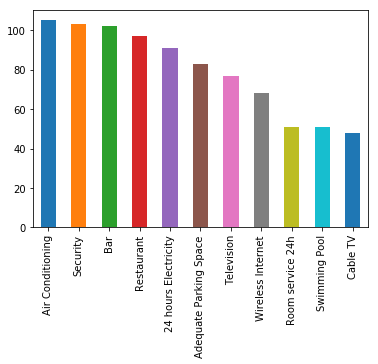

In [132]:
hotel_fac_top10.plot(kind="bar")

Least facilities in the hotels

In [133]:
hotel_facility_enc.loc[:, "24 hour Front Desk":].sum().sort_values(ascending=True)[0:11]

Handicap Accessible        1
Children's Playground      1
Convenience Shop           1
conference facilities      1
Proximity to Main Road     1
Barbecue grill(s)          1
Tours/ticket assistance    1
Jacuzzi                    1
Suya Spot                  1
Banking services           1
Asun Spot                  1
dtype: int64

It is reasonable that many of the hotels do not have facilities like Sauna, Daily newspaper, Live band

## Cluster Hotels

We will use K- means clustering method

In [134]:
# set number of clusters
kclusters = 5 #i.e create 5 different hotel groups

lagos_hotel_clustering = hotel_facility_enc.loc[:, "24 hour Front Desk":].copy()

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lagos_hotel_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 2, 4, 3, 1, 4, 3, 1, 3], dtype=int32)

In [135]:
print("Set of labels:", set(kmeans.labels_))

Set of labels: {0, 1, 2, 3, 4}


Let's create a new dataframe that includes the cluster

In [136]:
lagos_hotel_cluster = lagos_hotel_clustering.copy()

lagos_hotel_cluster['Cluster Labels'] = kmeans.labels_

In [137]:
lagos_hotel_cluster.head()

,24 hour Front Desk,24 hours Electricity,ATM,Adequate Parking Space,Air Conditioning,Airline Booking office,Airport pickup,Asun Spot,Babysitting,Banking services,Banquet Hall,Bar,Barbecue grill(s),Bathtub,Beauty Service,Breakfast,Bush Bar,Business Centre,CCTV camera,Cable TV,Car rental,Children's Playground,Concierge,Conference facility,Convenience Shop,Daily newspaper,Dinner,Double bed,Dry Cleaning,Electric Fence,Electronic Room Keys,Elevator/Lift,Event Hall,Fan,Free WiFi,Free parking,Gift Shop,Gym,Handicap Accessible,In House Dining,In-room safe,Inter Comm Telephone,Ironing,Jacuzzi,Key Card system,King sized bed,Kitchen,Live Band Entertainment,Luggage Storage,Lunch,Meeting Rooms,Night Club,Non Smoking Rooms,POS,Parking Garage,Pool Bar,Proximity to Main Road,Quiet Neighbourhood,Refrigerator,Restaurant,Room service 24h,Room service(limited hours),Sauna,Security,Shower,Single Bed,Sofa,Spa treatment,Study Desk,Suya Spot,Swimming Pool,Taxi Pickup,Television,Tennis court,Tours/ticket assistance,Valet Parking,Wake Up Service,Wardrobe,Water heater,Wired Internet,Wireless Internet,conference facilities,snooker board,Cluster Labels
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3
1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4
4,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,3


In [138]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood

hotel_details = hotel_merged.loc[:, "LGA":"Ratings"]
lagos_hotel_cluster = hotel_details.join(lagos_hotel_cluster)

lagos_hotel_cluster.head() # check the last columns!

,LGA,Hotel Name,Hotel Type,Hotel Latitude,Hotel Longitude,Hotel Address,ID,Ratings,24 hour Front Desk,24 hours Electricity,ATM,Adequate Parking Space,Air Conditioning,Airline Booking office,Airport pickup,Asun Spot,Babysitting,Banking services,Banquet Hall,Bar,Barbecue grill(s),Bathtub,Beauty Service,Breakfast,Bush Bar,Business Centre,CCTV camera,Cable TV,Car rental,Children's Playground,Concierge,Conference facility,Convenience Shop,Daily newspaper,Dinner,Double bed,Dry Cleaning,Electric Fence,Electronic Room Keys,Elevator/Lift,Event Hall,Fan,Free WiFi,Free parking,Gift Shop,Gym,Handicap Accessible,In House Dining,In-room safe,Inter Comm Telephone,Ironing,Jacuzzi,Key Card system,King sized bed,Kitchen,Live Band Entertainment,Luggage Storage,Lunch,Meeting Rooms,Night Club,Non Smoking Rooms,POS,Parking Garage,Pool Bar,Proximity to Main Road,Quiet Neighbourhood,Refrigerator,Restaurant,Room service 24h,Room service(limited hours),Sauna,Security,Shower,Single Bed,Sofa,Spa treatment,Study Desk,Suya Spot,Swimming Pool,Taxi Pickup,Television,Tennis court,Tours/ticket assistance,Valet Parking,Wake Up Service,Wardrobe,Water heater,Wired Internet,Wireless Internet,conference facilities,snooker board,Cluster Labels
0,Alimosho,De-Santos Hotel,Hotel,6.618271,3.311360,Lagos,53120436498e34993f341bbd,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3
1,Alimosho,Hotel Domitiana,Hotel,6.586043,3.284504,Egbeda-Idimu Road (Car Wash B/S),504a082af31c32cc5ce5f8ec,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Alimosho,West Park Hotel,Hotel Bar,6.589489,3.284005,Lagos,53f7b920498e33ee63f30bbe,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,Alimosho,Precious Garden Hotel,Hotel,6.612634,3.267993,6th Avenue,51287ac9e4b0964b0f9aa341,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4
4,Alimosho,Metrocity Hotels,None,6.597834,3.273032,Plot 217 Gowon Estate,5280d3e511d25111c23eea8a,NaN,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,3


Let's visualize the resulting clusters

In [139]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lagos_hotel_cluster['Hotel Latitude'], lagos_hotel_cluster['Hotel Longitude'], lagos_hotel_cluster['Hotel Name'], lagos_hotel_cluster['Cluster Labels']):
    label = folium.Popup(str(poi) +' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

Cluster 0

In [140]:
lagos_hotel_cluster.loc[lagos_hotel_cluster['Cluster Labels'] == 0, lagos_hotel_cluster.columns[[3] + list(range(7, lagos_hotel_cluster.shape[1]))]]

,Hotel Latitude,Ratings,24 hour Front Desk,24 hours Electricity,ATM,Adequate Parking Space,Air Conditioning,Airline Booking office,Airport pickup,Asun Spot,Babysitting,Banking services,Banquet Hall,Bar,Barbecue grill(s),Bathtub,Beauty Service,Breakfast,Bush Bar,Business Centre,CCTV camera,Cable TV,Car rental,Children's Playground,Concierge,Conference facility,Convenience Shop,Daily newspaper,Dinner,Double bed,Dry Cleaning,Electric Fence,Electronic Room Keys,Elevator/Lift,Event Hall,Fan,Free WiFi,Free parking,Gift Shop,Gym,Handicap Accessible,In House Dining,In-room safe,Inter Comm Telephone,Ironing,Jacuzzi,Key Card system,King sized bed,Kitchen,Live Band Entertainment,Luggage Storage,Lunch,Meeting Rooms,Night Club,Non Smoking Rooms,POS,Parking Garage,Pool Bar,Proximity to Main Road,Quiet Neighbourhood,Refrigerator,Restaurant,Room service 24h,Room service(limited hours),Sauna,Security,Shower,Single Bed,Sofa,Spa treatment,Study Desk,Suya Spot,Swimming Pool,Taxi Pickup,Television,Tennis court,Tours/ticket assistance,Valet Parking,Wake Up Service,Wardrobe,Water heater,Wired Internet,Wireless Internet,conference facilities,snooker board,Cluster Labels
1,6.586043,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10,6.485237,6.8,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
11,6.441288,NaN,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
16,6.551804,6.8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
17,6.559737,7.7,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
22,6.521251,5.4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
29,6.547156,NaN,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
32,6.545832,7.9,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
39,6.546207,8.7,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
41,6.551538,7.9,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0


Cluster 1

In [141]:
lagos_hotel_cluster.loc[lagos_hotel_cluster['Cluster Labels'] == 1, lagos_hotel_cluster.columns[[3] + list(range(7, lagos_hotel_cluster.shape[1]))]]

,Hotel Latitude,Ratings,24 hour Front Desk,24 hours Electricity,ATM,Adequate Parking Space,Air Conditioning,Airline Booking office,Airport pickup,Asun Spot,Babysitting,Banking services,Banquet Hall,Bar,Barbecue grill(s),Bathtub,Beauty Service,Breakfast,Bush Bar,Business Centre,CCTV camera,Cable TV,Car rental,Children's Playground,Concierge,Conference facility,Convenience Shop,Daily newspaper,Dinner,Double bed,Dry Cleaning,Electric Fence,Electronic Room Keys,Elevator/Lift,Event Hall,Fan,Free WiFi,Free parking,Gift Shop,Gym,Handicap Accessible,In House Dining,In-room safe,Inter Comm Telephone,Ironing,Jacuzzi,Key Card system,King sized bed,Kitchen,Live Band Entertainment,Luggage Storage,Lunch,Meeting Rooms,Night Club,Non Smoking Rooms,POS,Parking Garage,Pool Bar,Proximity to Main Road,Quiet Neighbourhood,Refrigerator,Restaurant,Room service 24h,Room service(limited hours),Sauna,Security,Shower,Single Bed,Sofa,Spa treatment,Study Desk,Suya Spot,Swimming Pool,Taxi Pickup,Television,Tennis court,Tours/ticket assistance,Valet Parking,Wake Up Service,Wardrobe,Water heater,Wired Internet,Wireless Internet,conference facilities,snooker board,Cluster Labels
5,6.472420,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1
8,6.472204,NaN,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
18,6.542639,8.3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
19,6.547615,6.7,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
20,6.550592,7.1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
38,6.509988,NaN,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
44,6.551768,8.4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
50,6.633959,6.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
76,6.584127,7.4,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
78,6.583635,6.7,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1


Cluster 2

In [142]:
lagos_hotel_cluster.loc[lagos_hotel_cluster['Cluster Labels'] == 2, lagos_hotel_cluster.columns[[3] + list(range(7, lagos_hotel_cluster.shape[1]))]]

,Hotel Latitude,Ratings,24 hour Front Desk,24 hours Electricity,ATM,Adequate Parking Space,Air Conditioning,Airline Booking office,Airport pickup,Asun Spot,Babysitting,Banking services,Banquet Hall,Bar,Barbecue grill(s),Bathtub,Beauty Service,Breakfast,Bush Bar,Business Centre,CCTV camera,Cable TV,Car rental,Children's Playground,Concierge,Conference facility,Convenience Shop,Daily newspaper,Dinner,Double bed,Dry Cleaning,Electric Fence,Electronic Room Keys,Elevator/Lift,Event Hall,Fan,Free WiFi,Free parking,Gift Shop,Gym,Handicap Accessible,In House Dining,In-room safe,Inter Comm Telephone,Ironing,Jacuzzi,Key Card system,King sized bed,Kitchen,Live Band Entertainment,Luggage Storage,Lunch,Meeting Rooms,Night Club,Non Smoking Rooms,POS,Parking Garage,Pool Bar,Proximity to Main Road,Quiet Neighbourhood,Refrigerator,Restaurant,Room service 24h,Room service(limited hours),Sauna,Security,Shower,Single Bed,Sofa,Spa treatment,Study Desk,Suya Spot,Swimming Pool,Taxi Pickup,Television,Tennis court,Tours/ticket assistance,Valet Parking,Wake Up Service,Wardrobe,Water heater,Wired Internet,Wireless Internet,conference facilities,snooker board,Cluster Labels
2,6.589489,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
21,6.546998,NaN,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
25,6.521116,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
30,6.509422,NaN,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
37,6.519058,6.6,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2
47,6.546270,NaN,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2
48,6.635063,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
53,6.500014,NaN,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
58,6.506794,6.4,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
65,6.613838,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2


Cluster 3

In [143]:
lagos_hotel_cluster.loc[lagos_hotel_cluster['Cluster Labels'] == 3, lagos_hotel_cluster.columns[[3] + list(range(7, lagos_hotel_cluster.shape[1]))]]

,Hotel Latitude,Ratings,24 hour Front Desk,24 hours Electricity,ATM,Adequate Parking Space,Air Conditioning,Airline Booking office,Airport pickup,Asun Spot,Babysitting,Banking services,Banquet Hall,Bar,Barbecue grill(s),Bathtub,Beauty Service,Breakfast,Bush Bar,Business Centre,CCTV camera,Cable TV,Car rental,Children's Playground,Concierge,Conference facility,Convenience Shop,Daily newspaper,Dinner,Double bed,Dry Cleaning,Electric Fence,Electronic Room Keys,Elevator/Lift,Event Hall,Fan,Free WiFi,Free parking,Gift Shop,Gym,Handicap Accessible,In House Dining,In-room safe,Inter Comm Telephone,Ironing,Jacuzzi,Key Card system,King sized bed,Kitchen,Live Band Entertainment,Luggage Storage,Lunch,Meeting Rooms,Night Club,Non Smoking Rooms,POS,Parking Garage,Pool Bar,Proximity to Main Road,Quiet Neighbourhood,Refrigerator,Restaurant,Room service 24h,Room service(limited hours),Sauna,Security,Shower,Single Bed,Sofa,Spa treatment,Study Desk,Suya Spot,Swimming Pool,Taxi Pickup,Television,Tennis court,Tours/ticket assistance,Valet Parking,Wake Up Service,Wardrobe,Water heater,Wired Internet,Wireless Internet,conference facilities,snooker board,Cluster Labels
0,6.618271,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3
4,6.597834,NaN,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,3
7,6.470938,NaN,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,3
9,6.448105,6.5,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,3
14,6.572201,7.3,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3
15,6.551011,8.1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3
23,6.544093,7.5,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3
26,6.551916,NaN,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3
28,6.534739,8.0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,3
33,6.541009,NaN,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,3


Cluster 4

In [144]:
lagos_hotel_cluster.loc[lagos_hotel_cluster['Cluster Labels'] == 4, lagos_hotel_cluster.columns[[3] + list(range(7, lagos_hotel_cluster.shape[1]))]]

,Hotel Latitude,Ratings,24 hour Front Desk,24 hours Electricity,ATM,Adequate Parking Space,Air Conditioning,Airline Booking office,Airport pickup,Asun Spot,Babysitting,Banking services,Banquet Hall,Bar,Barbecue grill(s),Bathtub,Beauty Service,Breakfast,Bush Bar,Business Centre,CCTV camera,Cable TV,Car rental,Children's Playground,Concierge,Conference facility,Convenience Shop,Daily newspaper,Dinner,Double bed,Dry Cleaning,Electric Fence,Electronic Room Keys,Elevator/Lift,Event Hall,Fan,Free WiFi,Free parking,Gift Shop,Gym,Handicap Accessible,In House Dining,In-room safe,Inter Comm Telephone,Ironing,Jacuzzi,Key Card system,King sized bed,Kitchen,Live Band Entertainment,Luggage Storage,Lunch,Meeting Rooms,Night Club,Non Smoking Rooms,POS,Parking Garage,Pool Bar,Proximity to Main Road,Quiet Neighbourhood,Refrigerator,Restaurant,Room service 24h,Room service(limited hours),Sauna,Security,Shower,Single Bed,Sofa,Spa treatment,Study Desk,Suya Spot,Swimming Pool,Taxi Pickup,Television,Tennis court,Tours/ticket assistance,Valet Parking,Wake Up Service,Wardrobe,Water heater,Wired Internet,Wireless Internet,conference facilities,snooker board,Cluster Labels
3,6.612634,NaN,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4
6,6.470447,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12,6.442785,8.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4
13,6.441935,8.5,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4
24,6.541911,NaN,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4
27,6.552516,7.6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,4
31,6.554617,NaN,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
35,6.520830,NaN,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
36,6.560529,NaN,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
43,6.521928,NaN,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4


In [145]:
cluster0 = lagos_hotel_cluster.loc[lagos_hotel_cluster['Cluster Labels'] == 0,
                                   "24 hour Front Desk":"snooker board" 
                                  ]
print(cluster0.shape[0], "hotels in cluster 0")
cluster1 = lagos_hotel_cluster.loc[lagos_hotel_cluster['Cluster Labels'] == 1,
                                  "24 hour Front Desk":"snooker board"
                                  ]
print(cluster1.shape[0], "hotels in cluster 1")
cluster2 = lagos_hotel_cluster.loc[lagos_hotel_cluster['Cluster Labels'] == 2,
                                  "24 hour Front Desk":"snooker board"
                                  ]
print(cluster2.shape[0], "hotels in cluster 2")
cluster3 = lagos_hotel_cluster.loc[lagos_hotel_cluster['Cluster Labels'] == 3,
                                  "24 hour Front Desk":"snooker board"
                                  ]
print(cluster3.shape[0], "hotels in cluster 3")
cluster4 = lagos_hotel_cluster.loc[lagos_hotel_cluster['Cluster Labels'] == 4,
                                  "24 hour Front Desk":"snooker board"
                                  ]
print(cluster4.shape[0], "hotels in cluster 4")

20 hotels in cluster 0
22 hotels in cluster 1
17 hotels in cluster 2
33 hotels in cluster 3
27 hotels in cluster 4


In [146]:
cluster0.sum().sort_values(ascending=False)[0:11]

Television                19
Dry Cleaning              19
Air Conditioning          18
24 hours Electricity      16
Bar                       16
Cable TV                  16
Security                  16
Restaurant                14
Room service 24h          13
Wireless Internet         11
Adequate Parking Space    10
dtype: int64

### Major Highlights of Cluster 0 Hotels.
There is Cable TV, 24 hours Electricity, with security, a bar and wireless internet in some. The rooms have Air conditioning.

In [147]:
cluster1.sum().sort_values(ascending=False)[0:11]

Wireless Internet         22
24 hours Electricity      21
Security                  21
Bar                       20
Swimming Pool             20
Restaurant                19
Air Conditioning          16
Adequate Parking Space    14
Event Hall                 9
Breakfast                  8
Television                 8
dtype: int64

### Major Highlights of Cluster 1 Hotels.
There is Wireless Internet and 24 hours electricity, with security, a bar and restaurant and pool. The rooms have Air conditioning.

In [148]:
cluster2.sum().sort_values(ascending=False)[0:11]

Dry Cleaning              16
Bar                       16
Air Conditioning          16
Adequate Parking Space    15
Restaurant                15
Car rental                15
24 hours Electricity      12
Security                  12
Concierge                 12
Room service 24h          12
Airport pickup             9
dtype: int64

### Major Highlights of Cluster 2 Hotels.
There is Adequate parking space, Security with Gym and Swimming Pool, restaurant. Some have Bar.

In [149]:
cluster3.sum().sort_values(ascending=False)[0:11]

Air Conditioning          33
Television                33
Restaurant                29
24 hours Electricity      29
Security                  29
Cable TV                  28
Bar                       28
Wireless Internet         26
Adequate Parking Space    21
Room service 24h          16
Refrigerator              15
dtype: int64

### Major Highlights of Cluster 3 Hotels.
There is AC and Cable TV with Refridgerator. No dry cleaning service. Adequate parking space in  most of the hotels

In [150]:
cluster4.sum().sort_values(ascending=False)[0:11]

Security                  25
Adequate Parking Space    23
Air Conditioning          22
Bar                       22
Restaurant                20
Television                15
24 hours Electricity      13
Room service 24h           8
King sized bed             8
Dry Cleaning               6
Luggage Storage            4
dtype: int64

### Major Highlights of Cluster 4 Hotels.
Security and Adequate Parking Space in most, with Bar. No cable TV but Television is available in most of the hotels in this cluster. You can be lucky to find luggage storage facility and dry cleaning service.